# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
pd.__version__

'2.0.2'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [5]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244913 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [5]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [21]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [22]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [62]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

/var/folders/5c/vmwbxs651m7d5qzp8tkc7v8m0000gn/T/ipykernel_1263/2196972783.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479487 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [8]:
len(movies)

244914

### List all Batman movies ever made

In [79]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [108]:
batman_df = movies[movies.title.str.contains('Batman', case=False, na=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [ ]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [111]:
hp_df = movies[movies.title.str.contains('Harry Potter', case=False, na=False)]
hp_df = hp_df.sort_values(by=['year'], ascending=False)
hp_df

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [16]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [17]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [19]:
len(movies[(movies.year >= 2000) & (movies.year <= 2018)])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [21]:
len(movies[movies.title == 'Hamlet'])

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [22]:
hamlet = movies[(movies.title == 'Hamlet') & (movies.year >=2000)]
hamlet = hamlet.sort_values(by=['year'], ascending=True)
hamlet

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [37]:
support_roles = cast[(cast.title == 'Inception') & (cast.n.isna())]
len(support_roles)

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [78]:
main_roles = cast[(cast.title == 'Inception') & (cast.n.notna())]
len(main_roles)

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [77]:
top_ten = main_roles.sort_values(by='n', ascending=True)
top_ten['name'].head(10)

590576        Leonardo DiCaprio
859993     Joseph Gordon-Levitt
3387147              Ellen Page
940923                Tom Hardy
2406531            Ken Watanabe
1876301              Dileep Rao
1615709          Cillian Murphy
183937             Tom Berenger
2765969        Marion Cotillard
1826027      Pete Postlethwaite
Name: name, dtype: object

### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [50]:
albus = cast[cast.character == 'Albus Dumbledore']
albus.title

704984                                    Epic Movie
792421           Harry Potter and the Goblet of Fire
792423     Harry Potter and the Order of the Phoenix
792424      Harry Potter and the Prisoner of Azkaban
947789       Harry Potter and the Chamber of Secrets
947790         Harry Potter and the Sorcerer's Stone
1685537                        Ultimate Hero Project
2248085                                       Potter
Name: title, dtype: object

In [52]:
albus.name

704984            Dane Farwell
792421          Michael Gambon
792423          Michael Gambon
792424          Michael Gambon
947789          Richard Harris
947790          Richard Harris
1685537    George (X) O'Connor
2248085      Timothy Tedmanson
Name: name, dtype: object

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [56]:
keanu = cast[cast.name == 'Keanu Reeves']
len(keanu)

62

In [59]:
roles = keanu[keanu.year >=1999].sort_values(by='year')
roles['character']

1892370                 Himself
1892369                 Dogstar
1892390                     Neo
1892387        Donnie Barksdale
1892398                 Griffin
1892397             Shane Falco
1892383             Nelson Moss
1892358           Conor O'Neill
1892391                     Neo
1892379           Julian Mercer
1892392                     Neo
1892351                 Dogstar
1892348        John Constantine
1892400             Perry Lyman
1892388              Alex Wyler
1892343              Bob Arctor
1892382    Detective Tom Ludlow
1892385                  Klaatu
1892396            Chris Nadeau
1892359             Henry Torne
1892357                    John
1892342                     Kai
1892368             Donaka Mark
1892361               John Wick
1892366                    Evan
1892365                   Keanu
1892393                    Hank
1892353        Detective Galban
1892399                  Ramsey
1892384               The Dream
1892381            Keanu Reeves
1892362 

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [62]:
roles = cast[((cast.type == 'actor') | (cast.type == 'actress')) & ((cast.year >=1950) & (cast.year <= 1960))]
len(roles)

234635

In [65]:
roles = cast[cast.type.isin(['actor', 'actress']) & cast.year.between(2007,2017)]
len(roles)

1452413

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [75]:
roles = cast[(cast.n == 1) & (cast.year>=2000)]
len(roles)

60568

In [76]:
roles = cast[(cast.n > 1) & (cast.year>=2000)]
len(roles)

1001710

In [74]:
roles = cast[cast.n.isna() & (cast.year>=2000)]
len(roles)

887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [ ]:
top_ten = movies.title.value_counts()[:10]
top_ten

### Plot the top ten common movie names of all time

In [ ]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [86]:
top3 = movies[movies.year.between(2000,2009)]
top3.year.value_counts().head(3)

year
2009    6125
2008    5151
2007    4467
Name: count, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

<Axes: xlabel='year'>

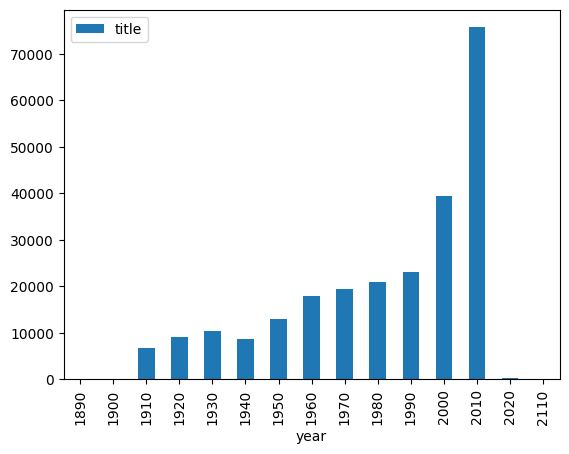

In [111]:
total = movies.groupby((movies.year//10)*10).count()[['title']]
total.plot(kind='bar')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [91]:
top10 = cast.character.value_counts()[:10]
top10

character
Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: count, dtype: int64

In [96]:
top10 = cast[cast.character == 'Herself']
top10.name.value_counts()[:10]

name
Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marta Berrocal                6
Sumie Sakai                   6
Name: count, dtype: int64

In [98]:
top10 = cast[cast.character == 'Himself']
top10.name.value_counts()[:10]

name
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: count, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [113]:
top10 = cast[cast.character.str.startswith('Zombie', na=False)]
top10.character.value_counts()[:10]

character
Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: count, dtype: int64

In [115]:
top10 = cast[cast.character.str.startswith('Police',na=False)]
top10.character.value_counts()[:10]

character
Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: count, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

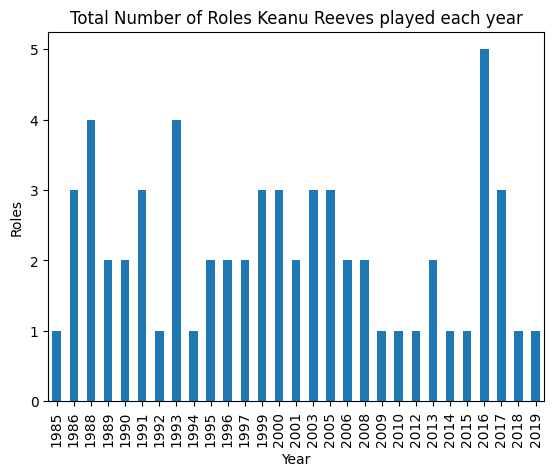

In [140]:
keanu = cast[cast.name == 'Keanu Reeves'].groupby('year').count().character
keanu

keanu.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Roles')
plt.title('Total Number of Roles Keanu Reeves played each year')
plt.show()

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


<Axes: xlabel='year', ylabel='n'>

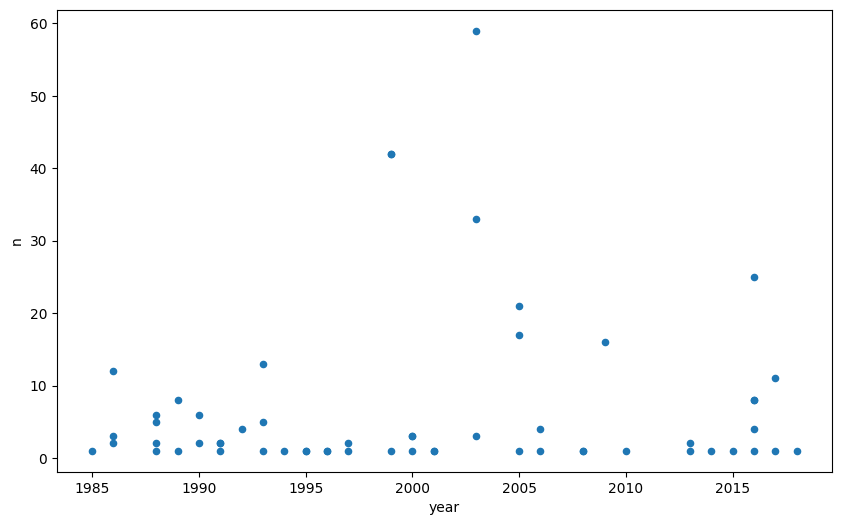

In [168]:
keanu = cast[(cast.name=="Keanu Reeves") & (cast.n.notna())][['year','n']]
keanu_sorted = keanu.sort_values(by='year')
keanu_sorted.plot(x='year', y='n', kind='scatter', figsize=(10,6))

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

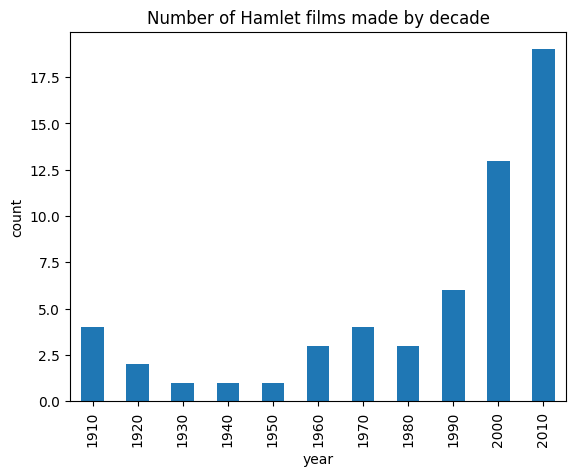

In [18]:
hamlet = movies[movies.title.str.contains('Hamlet', na=False)]
hamlet = hamlet.groupby((hamlet['year']//10)*10).count().year

hamlet.plot(kind='bar', x='year')
plt.xlabel('year')
plt.ylabel('count')
plt.title('Number of Hamlet films made by decade')
plt.show()

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [26]:
leading = cast[(cast.n==1) & cast.year.between(1960,1969)]
len(leading.character)

11823

In [27]:
leading = cast[(cast.n==1) & cast.year.between(2000,2009)]
len(leading.character)

26344

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [54]:
oz = cast[cast.name == 'Frank Oz']
oz = oz.groupby(['title','year']).count()
oz = oz.sort_values(by='year')
oz = oz[oz.name > 1][['name']]
oz

,,name
title,year,
The Muppet Movie,1979,8
An American Werewolf in London,1981,2
The Great Muppet Caper,1981,6
The Dark Crystal,1982,2
The Muppets Take Manhattan,1984,7
Follow That Bird,1985,3
The Muppet Christmas Carol,1992,7
Muppet Treasure Island,1996,4
Muppets from Space,1999,4


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [60]:
oz = cast[cast.name == 'Frank Oz']
oz = oz.groupby('character').count()
oz[oz.name >= 2][['name']].sort_values(by='name')

,name
character,
Grover,2
Bert,3
Fozzie Bear,4
Cookie Monster,5
Sam the Eagle,5
Animal,6
Miss Piggy,6
Yoda,6


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<Axes: xlabel='date'>

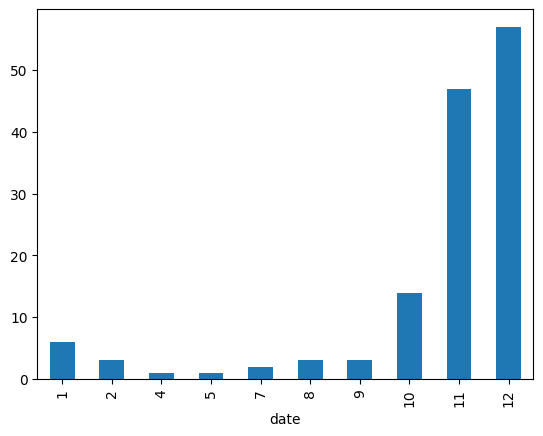

In [79]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<Axes: xlabel='date'>

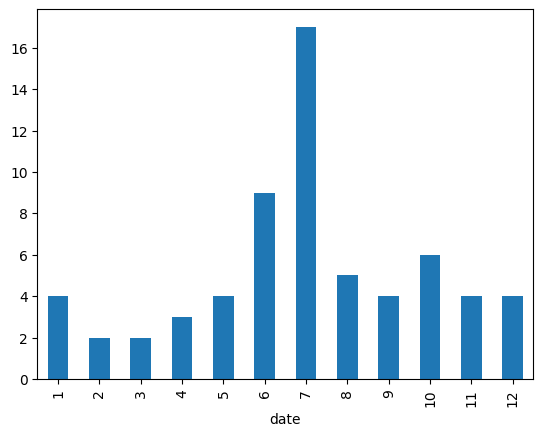

In [80]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<Axes: xlabel='week'>

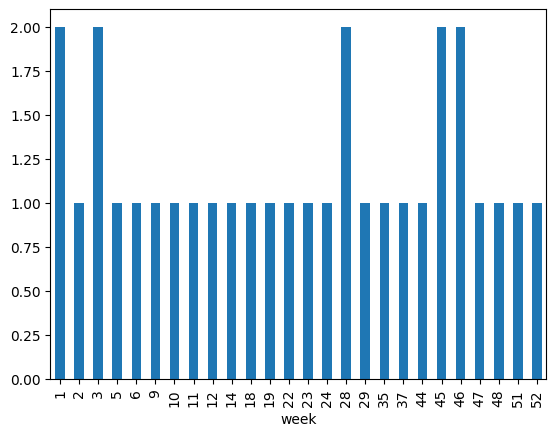

In [83]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [104]:
merged = cast[cast.name == 'Keanu Reeves'].merge(release_dates, on=['title','year'])
merged = merged[(merged.country == 'USA') & (merged.n == 1)].sort_values(by='date')
merged[['title','character','date']]

,title,character,date
1148,The Night Before,Winston Connelly,1988-04-15
92,Bill & Ted's Excellent Adventure,Ted,1989-02-17
83,Bill & Ted's Bogus Journey,Ted,1991-07-19
543,Little Buddha,Siddhartha,1994-05-25
678,Speed,Jack Traven,1994-06-10
475,Johnny Mnemonic,Johnny Mnemonic,1995-05-26
63,A Walk in the Clouds,Paul Sutton,1995-08-11
105,Chain Reaction,Eddie Kasalivich,1996-08-02
272,Feeling Minnesota,Jjaks Clayton,1996-09-13
836,The Devil's Advocate,Kevin Lomax,1997-10-17


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<Axes: xlabel='date'>

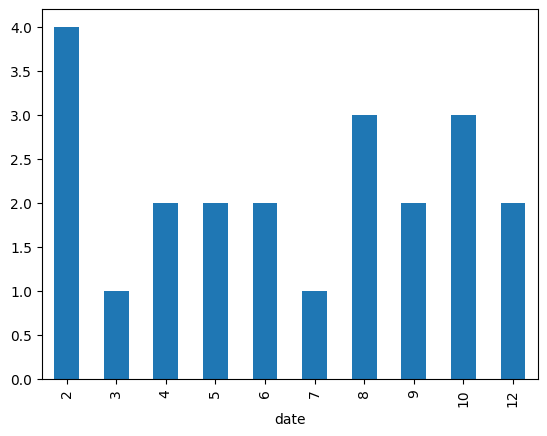

In [105]:
merged = merged[(merged.country == 'USA') & (merged.name == 'Keanu Reeves')]
merged.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<Axes: xlabel='date'>

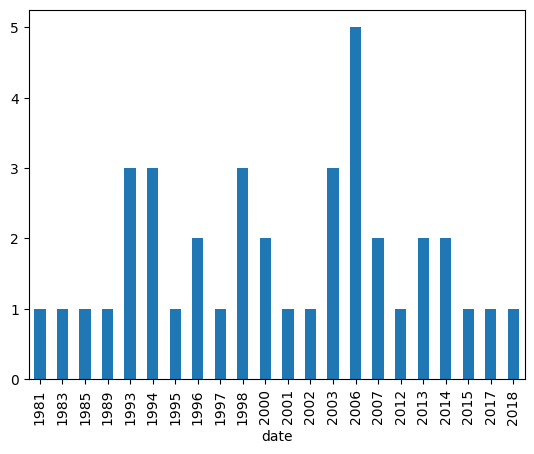

In [107]:
merged = cast[cast.name == 'Ian McKellen'].merge(release_dates, on=['title','year'])
merged = merged[(merged.country == 'USA')]
merged.date.dt.year.value_counts().sort_index().plot(kind='bar')